In [159]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
import seaborn as sn

import torchvision
import torchvision.transforms as transforms
from torch.utils import data
from torchvision.utils import make_grid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# DCGAN + GAN tricks
This time I used a bigger dataset (based on datasets from Kaggle) <br>
1) 150 epochs and 105.522 images <br>
2) Gaussian noise for Discriminator's input to slow down progress difference <br>
3) Noised labels (label smoothing) as a penalty for D (as mentioned in Salimans et. al. 2016) <br>

A bigger dataset with a bigger num of epochs required tricks like these for training stability. As a result, more "hard" details from images were caught from this bigger dataset.

In [163]:
channels = 3
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d( 100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 2, 64 * 1, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 1, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Epoch 0

In [3]:
netG = Generator().to(device)
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

<IPython.core.display.Javascript object>


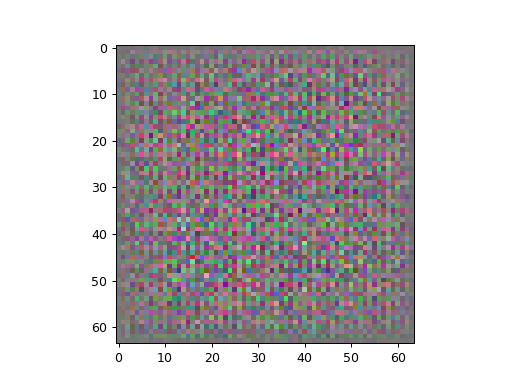

In [14]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

In [8]:
noise = torch.randn(64, 100, 1, 1, device=device)
img = netG(noise)

<IPython.core.display.Javascript object>


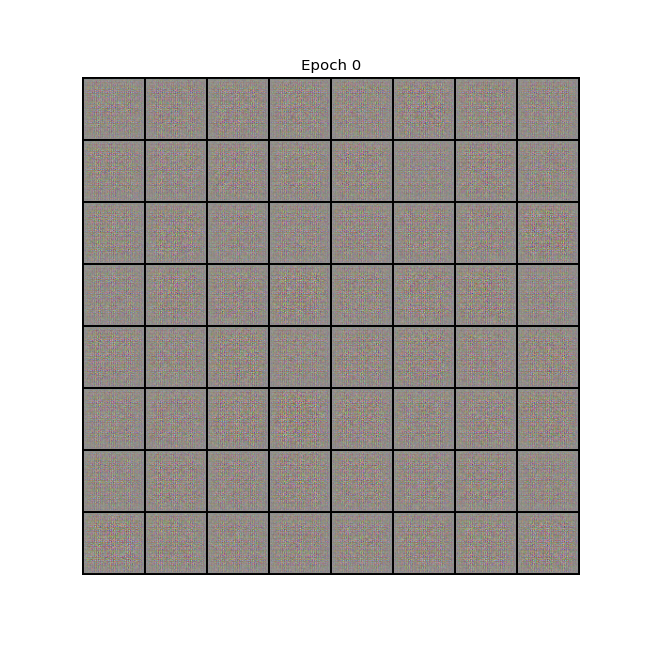

In [9]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Epoch 0")
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Epoch 1

In [148]:
netG = Generator().to(device)
netG.load_state_dict(torch.load("./models/biggererset_1_G.pt"))
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

<IPython.core.display.Javascript object>


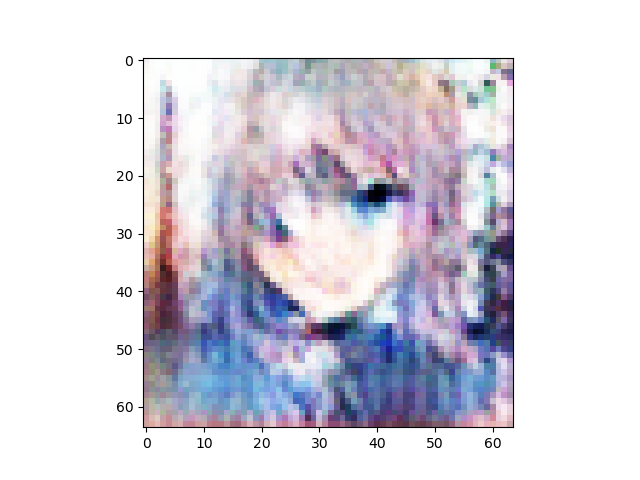

In [156]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

In [157]:
noise = torch.randn(64, 100, 1, 1, device=device)
img = netG(noise)

<IPython.core.display.Javascript object>


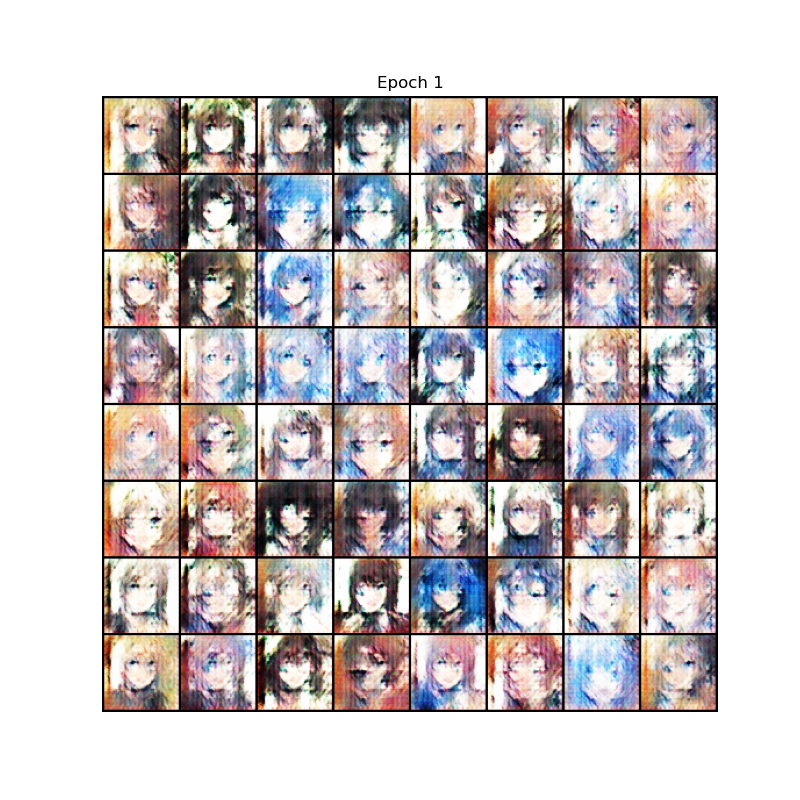

In [158]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Epoch 1")
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Epoch 10

In [126]:
netG = Generator().to(device)
netG.load_state_dict(torch.load("./models/biggererset_10_G.pt"))
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

<IPython.core.display.Javascript object>


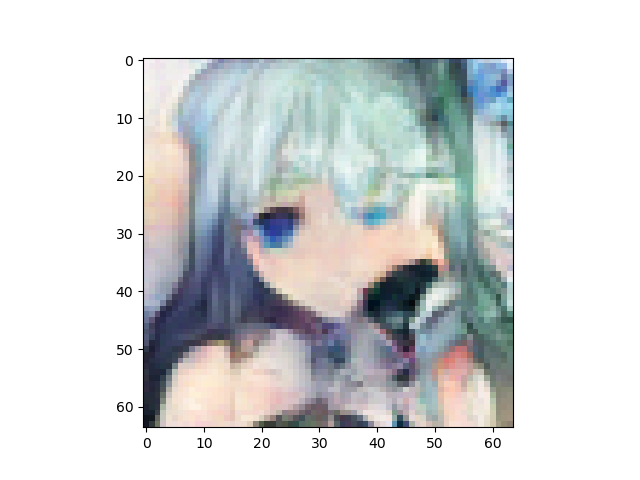

In [143]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

In [144]:
noise = torch.randn(64, 100, 1, 1, device=device)
img = netG(noise)

<IPython.core.display.Javascript object>


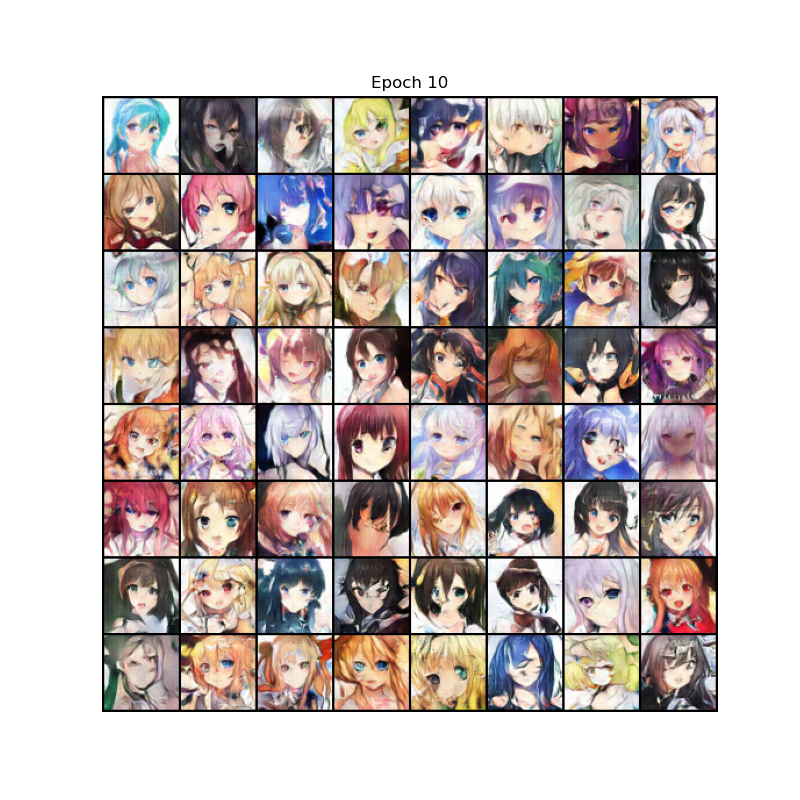

In [145]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Epoch 10")
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Epoch 50 

In [121]:
netG = Generator().to(device)
netG.load_state_dict(torch.load("./models/biggererset_50_G.pt"))
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

<IPython.core.display.Javascript object>


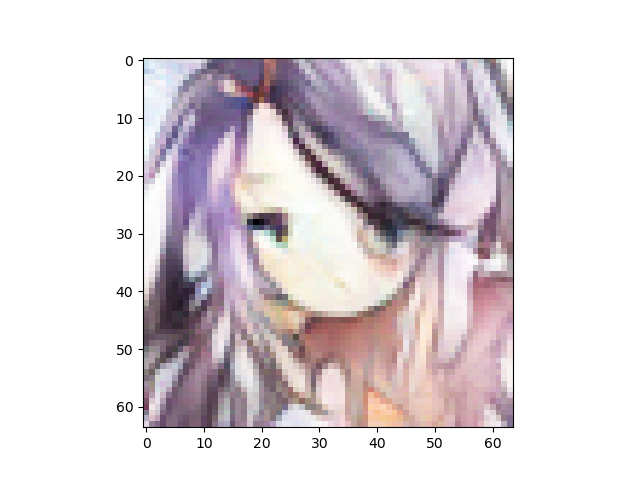

In [123]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

In [103]:
noise = torch.randn(64, 100, 1, 1, device=device)
img = netG(noise)

<IPython.core.display.Javascript object>


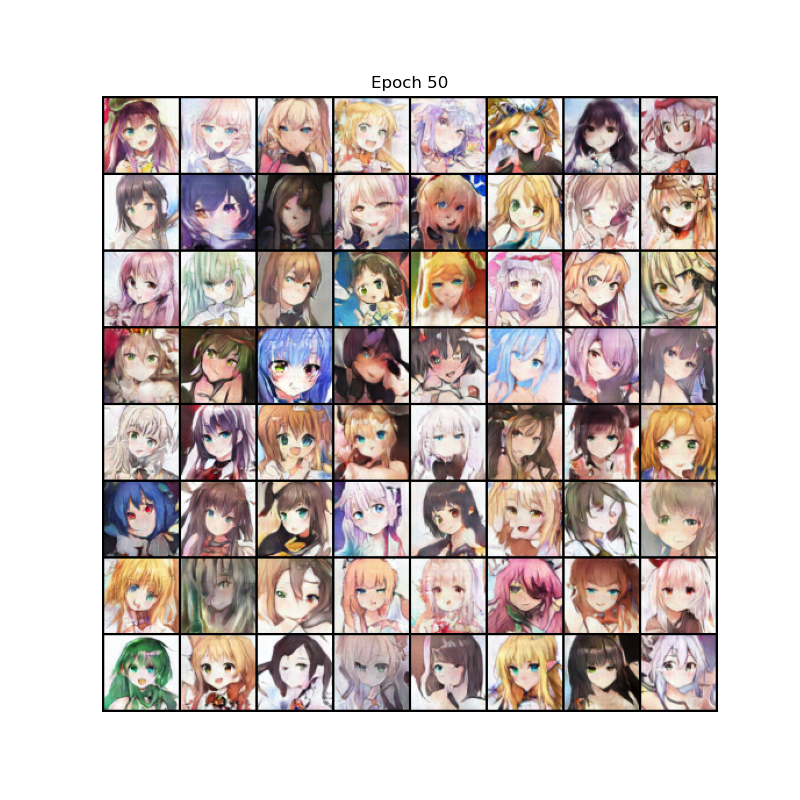

In [105]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Epoch 50")
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Epoch 100

In [106]:
netG = Generator().to(device)
netG.load_state_dict(torch.load("./models/biggererset_100_G.pt"))
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

<IPython.core.display.Javascript object>


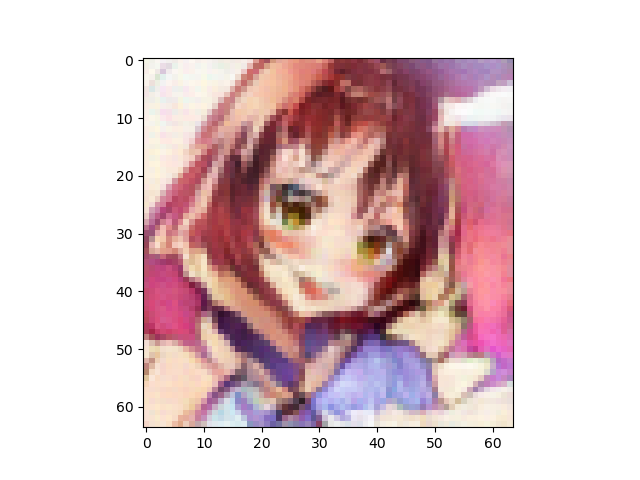

In [59]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

In [119]:
noise = torch.randn(64, 100, 1, 1, device=device)
img = netG(noise)

<IPython.core.display.Javascript object>


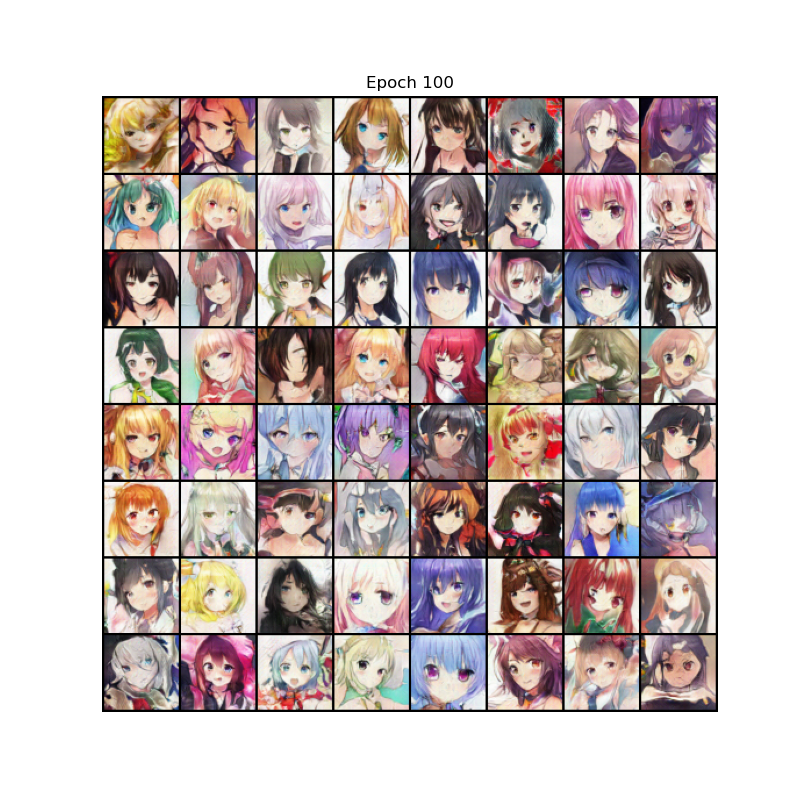

In [120]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Epoch 100")
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Epoch 150

In [164]:
netG = Generator().to(device)
netG.load_state_dict(torch.load("./models/biggererset_150_G.pt"))
netG.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

<IPython.core.display.Javascript object>


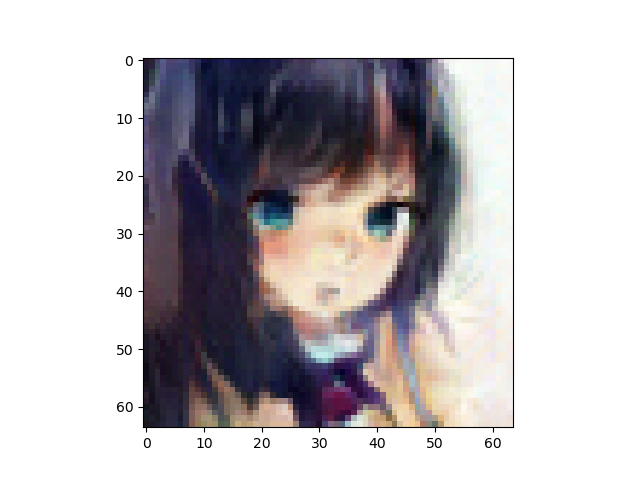

In [74]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

<IPython.core.display.Javascript object>


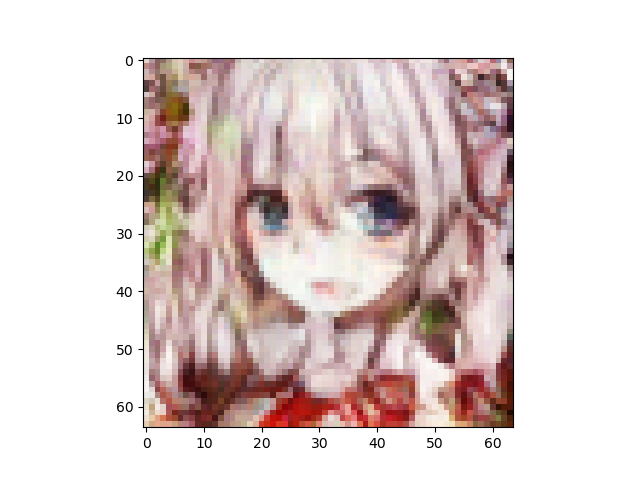

In [179]:
noise = torch.randn(1, 100, 1, 1, device=device)
img = netG(noise)
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device), normalize=True).cpu(),(1,2,0)))

In [124]:
noise = torch.randn(64, 100, 1, 1, device=device)
img = netG(noise)

<IPython.core.display.Javascript object>


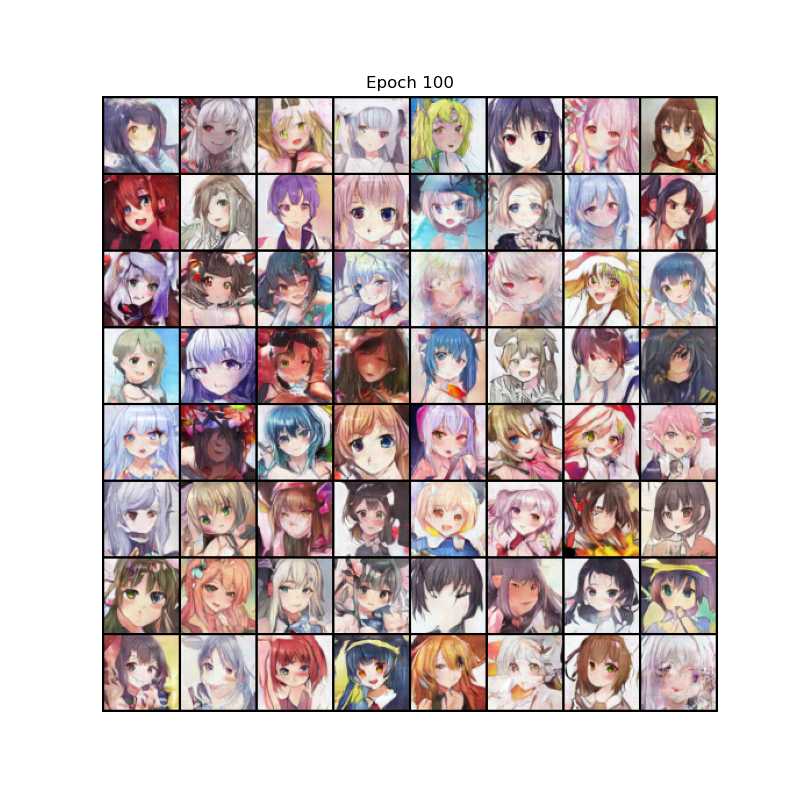

In [7]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Epoch 100")
plt.imshow(np.transpose(torchvision.utils.make_grid(img.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))